In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [6]:
df = pd.DataFrame()
df2024 = pd.read_csv("Services/services-2024.csv")
df2025_1 = pd.read_csv("Services/services-2025-01.csv")
df2025_2 = pd.read_csv("Services/services-2025-02.csv")
df2025_3 = pd.read_csv("Services/services-2025-03.csv")
df2025_4 = pd.read_csv("Services/services-2025-04.csv")
df2025_5 = pd.read_csv("Services/services-2025-05.csv")
df2025_6 = pd.read_csv("Services/services-2025-06.csv")
df2025_7 = pd.read_csv("Services/services-2025-07.csv")
df2025_8 = pd.read_csv("Services/services-2025-08.csv")
df2025_9 = pd.read_csv("Services/services-2025-09.csv")
df2025_10 = pd.read_csv("Services/services-2025-10.csv")

dataframes_to_add = [df2024, df2025_1, df2025_2, df2025_3, df2025_4, df2025_5, df2025_6, df2025_7, df2025_8, df2025_9, df2025_10]

for i in dataframes_to_add:
    df = pd.concat([df, i], ignore_index=True)

df.head(10)

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,Stop:Station name,Stop:Arrival time,Stop:Arrival delay,Stop:Arrival cancelled,Stop:Departure time,Stop:Departure delay,Stop:Departure cancelled,Stop:Platform change,Stop:Planned platform,Stop:Actual platform
0,12690865,2024-01-01,Intercity,NS,1410,False,False,2,114307592,RTD,Rotterdam Centraal,NaN,NaN,NaN,2024-01-01T02:00:00+01:00,0.0,False,False,9,9
1,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307593,DT,Delft,2024-01-01T02:13:00+01:00,0.0,False,2024-01-01T02:13:00+01:00,0.0,False,False,1,1
2,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307594,GV,Den Haag HS,2024-01-01T02:21:00+01:00,0.0,False,2024-01-01T02:22:00+01:00,0.0,False,False,6,6
3,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307595,LEDN,Leiden Centraal,2024-01-01T02:35:00+01:00,0.0,False,2024-01-01T02:40:00+01:00,0.0,False,True,5b,8b
4,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307596,SHL,Schiphol Airport,2024-01-01T03:00:00+01:00,0.0,False,2024-01-01T03:03:00+01:00,0.0,False,False,3,3
5,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307597,ASS,Amsterdam Sloterdijk,2024-01-01T03:12:00+01:00,0.0,False,2024-01-01T03:12:00+01:00,0.0,False,False,12,12
6,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307598,ASD,Amsterdam Centraal,2024-01-01T03:18:00+01:00,1.0,False,2024-01-01T03:20:00+01:00,2.0,False,False,4,4
7,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307599,ASB,Amsterdam Bijlmer ArenA,2024-01-01T03:31:00+01:00,2.0,False,2024-01-01T03:31:00+01:00,2.0,False,False,8,8
8,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307600,UT,Utrecht Centraal,2024-01-01T03:50:00+01:00,0.0,False,NaN,NaN,NaN,False,15,15
9,12690866,2024-01-01,Nightjet,NS Int,420,False,False,6,114307601,NURNB,Nürnberg Hbf,NaN,NaN,NaN,2024-01-01T02:01:00+01:00,0.0,False,False,NaN,NaN


C:\Users\niels\AppData\Local\Temp\ipykernel_23872\697857627.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn_r', len(labels))


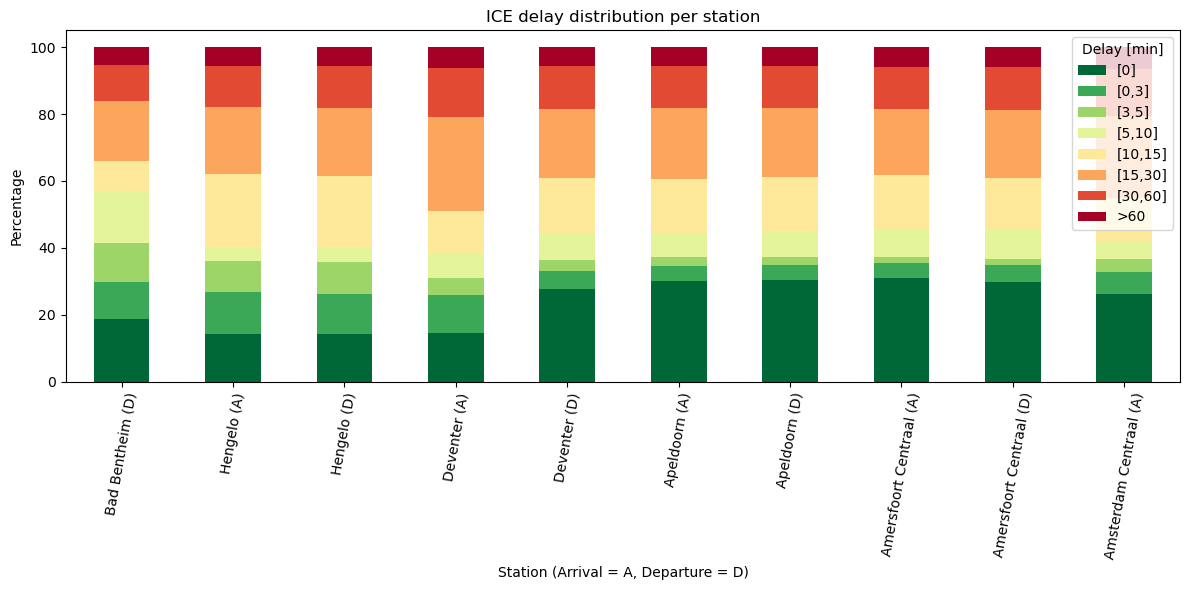

In [9]:
train_number = [242, 240, 148, 146, 144, 142, 140]
df_train = df[df["Service:Train number"].isin(train_number)]
df_train = df_train[df_train["Service:Partly cancelled"] == False]
df_train.head(50)

bins = [-1, 1, 3, 5, 10, 15, 30, 60, float('inf')]
labels = ['[0]', '[0,3]', '[3,5]', '[5,10]', '[10,15]', '[15,30]', '[30,60]', '>60']

# Arrival delay
df_arrival = df_train[['Stop:Station name', 'Stop:Arrival delay', 'Stop:Arrival time']].copy()
df_arrival.rename(columns={'Stop:Arrival delay': 'Delay', 'Stop:Arrival time': 'Time'}, inplace=True)
df_arrival['Type'] = '(A)'
df_arrival['Delay category'] = pd.cut(df_arrival['Delay'], bins=bins, labels=labels)

# Departure delay
df_departure = df_train[['Stop:Station name', 'Stop:Departure delay', 'Stop:Departure time']].copy()
df_departure.rename(columns={'Stop:Departure delay': 'Delay', 'Stop:Departure time': 'Time'}, inplace=True)
df_departure['Type'] = '(D)'
df_departure['Delay category'] = pd.cut(df_departure['Delay'], bins=bins, labels=labels)

df_long = pd.concat([df_arrival, df_departure], ignore_index=True)

# Voeg kolom Station_Type toe
df_long['Station_Type'] = df_long['Stop:Station name'] + ' ' + df_long['Type']

# --- Hier kun je de volgorde zelf bepalen ---
# Bijvoorbeeld handmatig: Station1_dep, Station2_arr, Station2_dep, ...
station_order = [
    # 'Berlin Ostbahnhof (D)',
    # 'Berlin Hbf (A)', 'Berlin Hbf (D)',
    # 'Berlin-Spandau (A)', 'Berlin-Spandau (D)',
    # 'Hannover Hbf (A)', 'Hannover Hbf (D)',
    # 'Bünde (Westf) (A)', 'Bünde (Westf) (D)', 
    # 'Osnabrück Hbf (A)', 'Osnabrück Hbf (D)', 
    # 'Rheine (A)', 'Rheine (D)',
    # 'Bad Bentheim (A)',
    'Bad Bentheim (D)', 
    'Oldenzaal (A)', 'Oldenzaal (D)',
    'Hengelo (A)', 
    'Hengelo (D)',
    'Deventer (A)', 'Deventer (D)', 'Apeldoorn (A)', 'Apeldoorn (D)',
    'Amersfoort Centraal (A)', 'Amersfoort Centraal (D)', 'Amsterdam Centraal (A)'
]
# Filter zodat alleen stations die in de data zitten worden meegenomen
station_order = [s for s in station_order if s in df_long['Station_Type'].unique()]

# Zet de index in de gewenste volgorde
station_delay = pd.crosstab(df_long['Station_Type'], df_long['Delay category'])
station_delay_percent = station_delay.div(station_delay.sum(axis=1), axis=0) * 100
station_delay_percent = station_delay_percent.loc[station_order]

cmap = cm.get_cmap('RdYlGn_r', len(labels))
colors = [cmap(i) for i in range(cmap.N)]

# 4. Plot gestapelde staafdiagram
station_delay_percent.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)

plt.ylabel('Percentage')
plt.xlabel('Station (Arrival = A, Departure = D)')
plt.title(f'ICE delay distribution per station')
plt.legend(title='Delay [min]')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig(f'ICE_delay_distribution_NL2.png')
plt.show()

C:\Users\niels\AppData\Local\Temp\ipykernel_32924\3836151882.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn_r', len(labels))


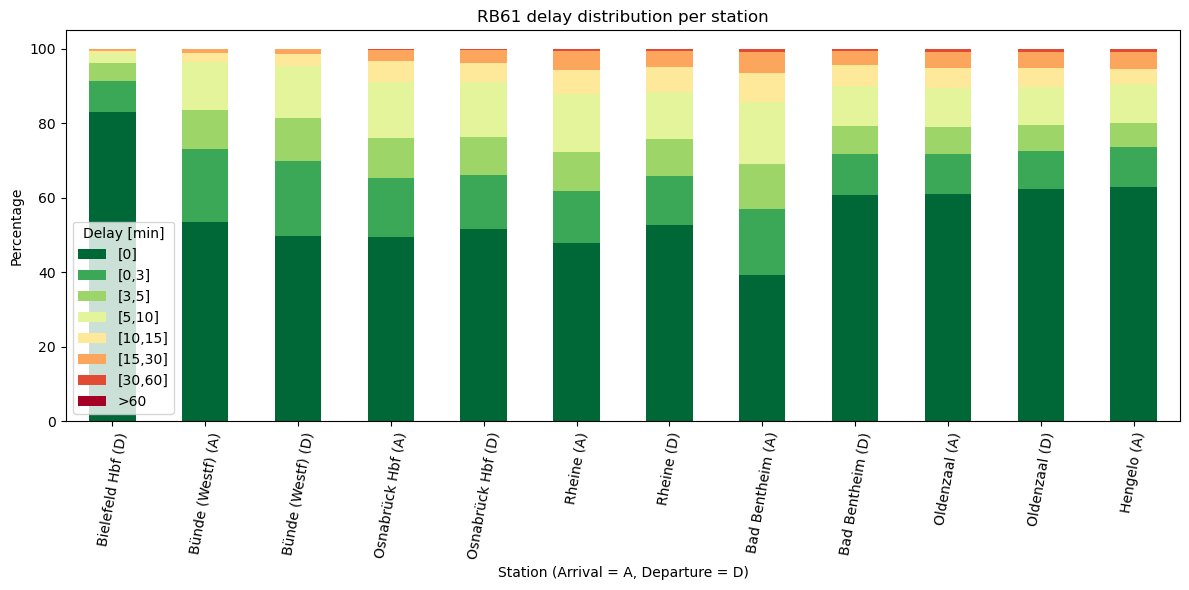

In [14]:
train_number = [20350, 20352, 20354, 20356, 20358, 20360, 20362, 20364, 20366, 20368, 20370, 20372, 20374, 20376, 20378, 20380, 20382, 20384, 20386]
df_train = df[df["Service:Train number"].isin(train_number)]
df_train = df_train[df_train["Service:Partly cancelled"] == False]
df_train.head(50)

bins = [-1, 1, 3, 5, 10, 15, 30, 60, float('inf')]
labels = ['[0]', '[0,3]', '[3,5]', '[5,10]', '[10,15]', '[15,30]', '[30,60]', '>60']

# Arrival delay
df_arrival = df_train[['Stop:Station name', 'Stop:Arrival delay', 'Stop:Arrival time']].copy()
df_arrival.rename(columns={'Stop:Arrival delay': 'Delay', 'Stop:Arrival time': 'Time'}, inplace=True)
df_arrival['Type'] = '(A)'
df_arrival['Delay category'] = pd.cut(df_arrival['Delay'], bins=bins, labels=labels)

# Departure delay
df_departure = df_train[['Stop:Station name', 'Stop:Departure delay', 'Stop:Departure time']].copy()
df_departure.rename(columns={'Stop:Departure delay': 'Delay', 'Stop:Departure time': 'Time'}, inplace=True)
df_departure['Type'] = '(D)'
df_departure['Delay category'] = pd.cut(df_departure['Delay'], bins=bins, labels=labels)

df_long = pd.concat([df_arrival, df_departure], ignore_index=True)

# Voeg kolom Station_Type toe
df_long['Station_Type'] = df_long['Stop:Station name'] + ' ' + df_long['Type']

# --- Hier kun je de volgorde zelf bepalen ---
# Bijvoorbeeld handmatig: Station1_dep, Station2_arr, Station2_dep, ...
station_order = [
    'Bielefeld Hbf (D)',
    'Bünde (Westf) (A)', 'Bünde (Westf) (D)', 
    'Osnabrück Hbf (A)', 'Osnabrück Hbf (D)', 
    'Rheine (A)', 'Rheine (D)',
    'Bad Bentheim (A)',
    'Bad Bentheim (D)', 
    'Oldenzaal (A)', 'Oldenzaal (D)',
    'Hengelo (A)', 
    # 'Hengelo (D)',
    # 'Deventer (A)', 'Deventer (D)', 'Apeldoorn (A)', 'Apeldoorn (D)',
    # 'Amersfoort Centraal (A)', 'Amersfoort Centraal (D)', 'Amsterdam Centraal (A)'
]
# Filter zodat alleen stations die in de data zitten worden meegenomen
station_order = [s for s in station_order if s in df_long['Station_Type'].unique()]

# Zet de index in de gewenste volgorde
station_delay = pd.crosstab(df_long['Station_Type'], df_long['Delay category'])
station_delay_percent = station_delay.div(station_delay.sum(axis=1), axis=0) * 100
station_delay_percent = station_delay_percent.loc[station_order]

cmap = cm.get_cmap('RdYlGn_r', len(labels))
colors = [cmap(i) for i in range(cmap.N)]

# 4. Plot gestapelde staafdiagram
station_delay_percent.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)

plt.ylabel('Percentage')
plt.xlabel('Station (Arrival = A, Departure = D)')
plt.title(f'RB61 delay distribution per station')
plt.legend(title='Delay [min]')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig(f'RB61_delay_distribution_per_station.png')
plt.show()

C:\Users\niels\AppData\Local\Temp\ipykernel_15556\1150739266.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn_r', len(labels))


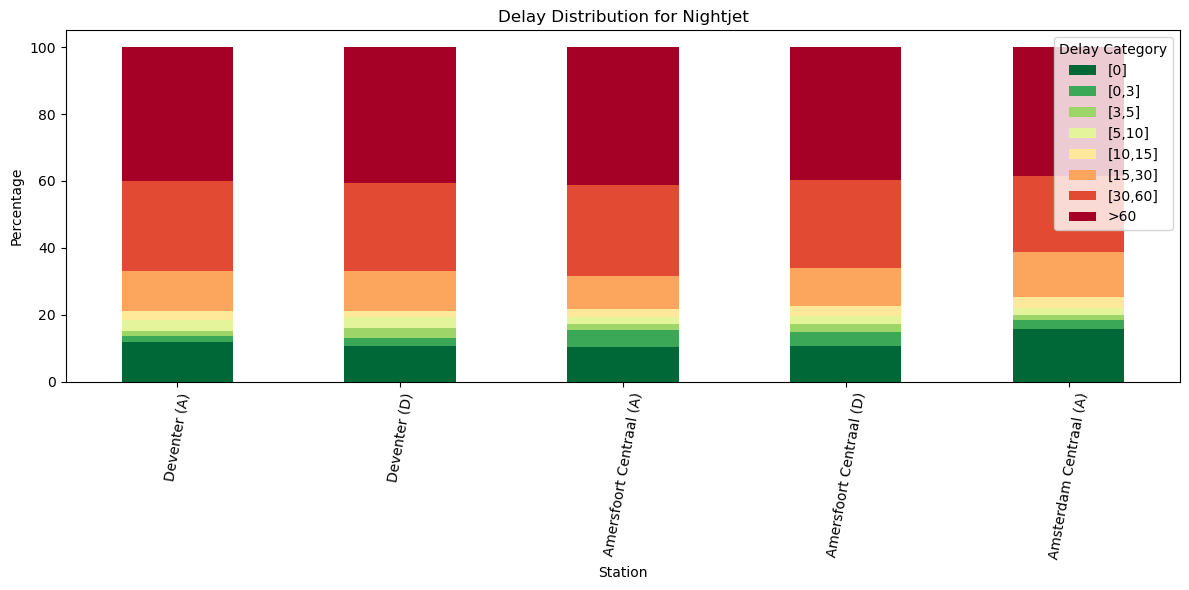

In [11]:
train_number = 420
df_train = df[df["Service:Train number"] == train_number]
df_train = df_train[df_train["Service:Partly cancelled"] == False]
df_train.head(50)

bins = [-1, 1, 3, 5, 10, 15, 30, 60, float('inf')]
labels = ['[0]', '[0,3]', '[3,5]', '[5,10]', '[10,15]', '[15,30]', '[30,60]', '>60']

# Arrival delay
df_arrival = df_train[['Stop:Station name', 'Stop:Arrival delay', 'Stop:Arrival time']].copy()
df_arrival.rename(columns={'Stop:Arrival delay': 'Delay', 'Stop:Arrival time': 'Time'}, inplace=True)
df_arrival['Type'] = '(A)'
df_arrival['Delay category'] = pd.cut(df_arrival['Delay'], bins=bins, labels=labels)

# Departure delay
df_departure = df_train[['Stop:Station name', 'Stop:Departure delay', 'Stop:Departure time']].copy()
df_departure.rename(columns={'Stop:Departure delay': 'Delay', 'Stop:Departure time': 'Time'}, inplace=True)
df_departure['Type'] = '(D)'
df_departure['Delay category'] = pd.cut(df_departure['Delay'], bins=bins, labels=labels)

df_long = pd.concat([df_arrival, df_departure], ignore_index=True)

# Voeg kolom Station_Type toe
df_long['Station_Type'] = df_long['Stop:Station name'] + ' ' + df_long['Type']

# --- Hier kun je de volgorde zelf bepalen ---
# Bijvoorbeeld handmatig: Station1_dep, Station2_arr, Station2_dep, ...
station_order = [
    #'Bad Bentheim (D)', #'Hengelo (A)', 'Hengelo (D)',
    'Deventer (A)', 'Deventer (D)', 'Apeldoorn (A)', 'Apeldoorn (D)',
    'Amersfoort Centraal (A)', 'Amersfoort Centraal (D)', 'Amsterdam Centraal (A)'
]
# Filter zodat alleen stations die in de data zitten worden meegenomen
station_order = [s for s in station_order if s in df_long['Station_Type'].unique()]

# Zet de index in de gewenste volgorde
station_delay = pd.crosstab(df_long['Station_Type'], df_long['Delay category'])
station_delay_percent = station_delay.div(station_delay.sum(axis=1), axis=0) * 100
station_delay_percent = station_delay_percent.loc[station_order]

cmap = cm.get_cmap('RdYlGn_r', len(labels))
colors = [cmap(i) for i in range(cmap.N)]

# 4. Plot gestapelde staafdiagram
station_delay_percent.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)

plt.ylabel('Percentage')
plt.xlabel('Station')
plt.title(f'Delay Distribution for Nightjet')
plt.legend(title='Delay Category')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig(f'complete_delay_distribution_nightjet_if_driven.png')
plt.show()

In [23]:
ICE_trains = [242, 240, 148, 146, 144, 142, 140]
mean_delay_list_A = []
mean_delay_list_D = []
std_delay_list_A = []
std_delay_list_D = []

for i in ICE_trains:
    df_train = df[df["Service:Train number"] == i]
    
    # Arrival
    arrival_mean = df_train['Stop:Arrival delay'].median()
    mean_delay_list_A.append(arrival_mean)
    arrival_std = df_train['Stop:Arrival delay'].std()
    std_delay_list_A.append(arrival_std)
    
    # Departure
    departure_mean = df_train['Stop:Departure delay'].median()
    mean_delay_list_D.append(departure_mean)
    departure_std = df_train['Stop:Departure delay'].std()
    std_delay_list_D.append(departure_std)
    
    print(f"Train {i}:")
    print(f"  Arrival delay: mean={arrival_mean:.2f}, std={arrival_std:.2f}")
    print(f"  Departure delay: mean={departure_mean:.2f}, std={departure_std:.2f}")
    print()

Train 242:
  Arrival delay: mean=3.00, std=13.73
  Departure delay: mean=2.00, std=12.07

Train 240:
  Arrival delay: mean=2.00, std=16.54
  Departure delay: mean=1.00, std=16.27

Train 148:
  Arrival delay: mean=3.00, std=19.79
  Departure delay: mean=2.00, std=19.33

Train 146:
  Arrival delay: mean=3.00, std=21.25
  Departure delay: mean=3.00, std=20.72

Train 144:
  Arrival delay: mean=4.00, std=17.79
  Departure delay: mean=3.00, std=17.55

Train 142:
  Arrival delay: mean=4.00, std=19.32
  Departure delay: mean=3.00, std=19.42

Train 140:
  Arrival delay: mean=6.00, std=29.76
  Departure delay: mean=5.00, std=29.36



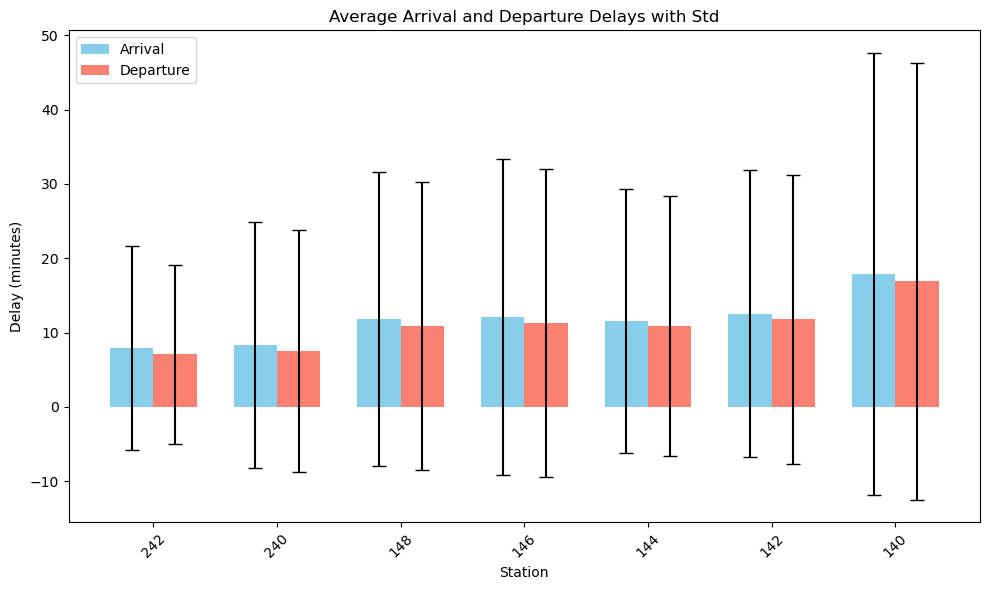

In [108]:
x = np.arange(len(ICE_trains))  # posities op de x-as
width = 0.35  # breedte van de staven

fig, ax = plt.subplots(figsize=(10,6))

# Arrival bars
ax.bar(x - width/2, mean_delay_list_A, width, yerr=std_delay_list_A, capsize=5, label='Arrival', color='skyblue')

# Departure bars
ax.bar(x + width/2, mean_delay_list_D, width, yerr=std_delay_list_D, capsize=5, label='Departure', color='salmon')

ax.set_ylabel('Delay (minutes)')
ax.set_xlabel('Station')
ax.set_title('Average Arrival and Departure Delays with Std')
ax.set_xticks(x)
ax.set_xticklabels(ICE_trains, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

C:\Users\niels\AppData\Local\Temp\ipykernel_26488\191633109.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_means = df_plot.pivot_table(index='Station_Type', columns='Service:Train number', values='Mean', aggfunc='mean')
C:\Users\niels\AppData\Local\Temp\ipykernel_26488\191633109.py:33: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_stds  = df_plot.pivot_table(index='Station_Type', columns='Service:Train number', values='Std', aggfunc='mean')


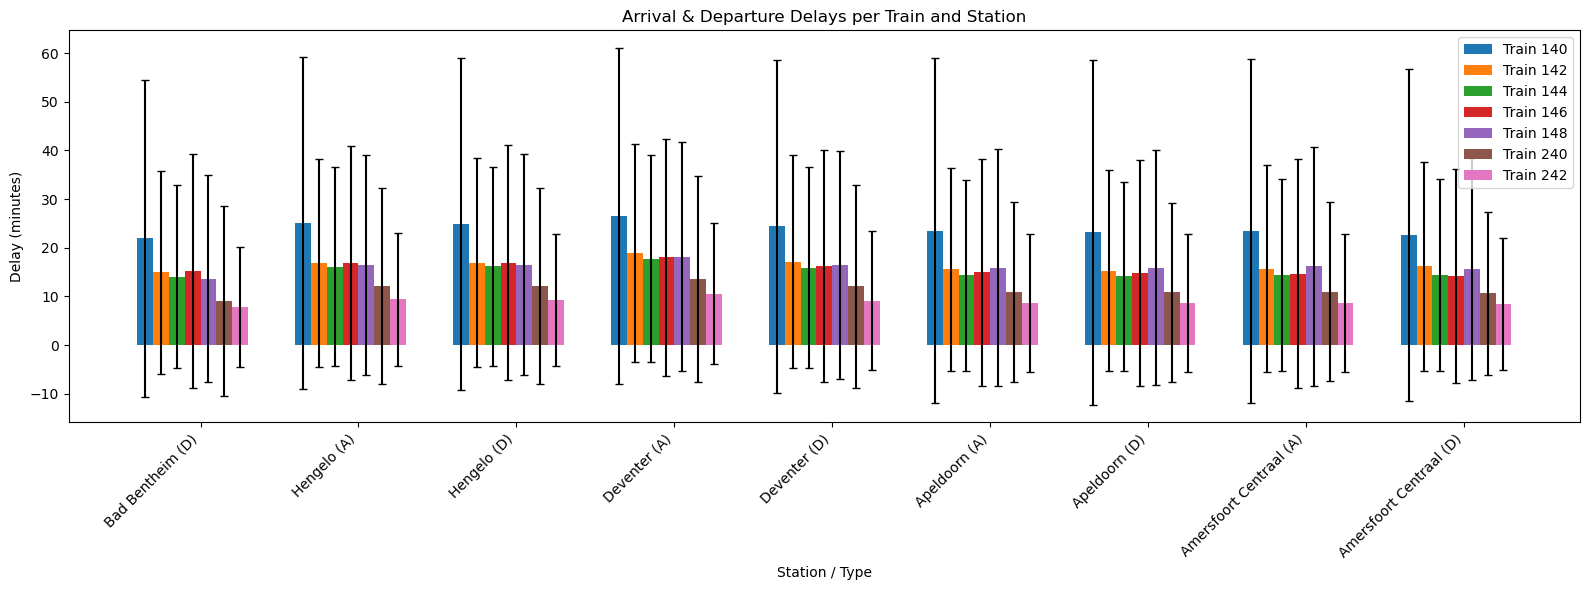

In [9]:
# --- Flatten MultiIndex columns als dat nodig is ---
if isinstance(stats.columns, pd.MultiIndex):
    stats.columns = ['_'.join(filter(None, col)).strip() for col in stats.columns.values]

# --- Maak lange DataFrame met Arrival en Departure ---
df_long = stats.reset_index()

df_arrival = df_long[['Service:Train number', 'Stop:Station name']].copy()
df_arrival['Mean'] = df_long['Stop:Arrival delay_mean']
df_arrival['Std']  = df_long['Stop:Arrival delay_std']
df_arrival['Type'] = 'A'

df_departure = df_long[['Service:Train number', 'Stop:Station name']].copy()
df_departure['Mean'] = df_long['Stop:Departure delay_mean']
df_departure['Std']  = df_long['Stop:Departure delay_std']
df_departure['Type'] = 'D'

df_plot = pd.concat([df_arrival, df_departure])
df_plot['Station_Type'] = df_plot['Stop:Station name'] + ' (' + df_plot['Type'] + ')'

# --- Handmatige volgorde van station-events ---
station_order = [
    'Bad Bentheim (D)', 'Hengelo (A)', 'Hengelo (D)',
    'Deventer (A)', 'Deventer (D)', 'Apeldoorn (A)', 'Apeldoorn (D)',
    'Amersfoort Centraal (A)', 'Amersfoort Centraal (D)'
]
station_order = [s for s in station_order if s in df_plot['Station_Type'].unique()]
df_plot['Station_Type'] = pd.Categorical(df_plot['Station_Type'], categories=station_order, ordered=True)
df_plot = df_plot.sort_values('Station_Type')

# --- Pivot voor plotten ---
df_means = df_plot.pivot_table(index='Station_Type', columns='Service:Train number', values='Mean', aggfunc='mean')
df_stds  = df_plot.pivot_table(index='Station_Type', columns='Service:Train number', values='Std', aggfunc='mean')

stations_types = df_means.index
trains = df_means.columns
x = np.arange(len(stations_types))
width = 0.1

# # --- Kleuren per Type ---
# type_colors = {'A': 'skyblue', 'D': 'salmon'}
# station_types_map = {s: 'A' if '(A)' in s else 'D' for s in stations_types}
# colors = [type_colors[station_types_map[s]] for s in stations_types]

# --- Plot ---
fig, ax = plt.subplots(figsize=(16,6))

for i, train in enumerate(trains):
    means = df_means[train].values
    stds  = df_stds[train].values
    ax.bar(x + i*width - (len(trains)/2)*width, means, width, yerr=stds, capsize=3, label=f'Train {train}')

ax.set_xticks(x)
ax.set_xticklabels(stations_types, rotation=45, ha='right')
ax.set_ylabel('Delay (minutes)')
ax.set_xlabel('Station / Type')
ax.set_title('Arrival & Departure Delays per Train and Station')
ax.legend()
plt.tight_layout()
plt.show()

In [96]:
delay_value = 58
train_analysis = [242, 240, 148, 146, 144, 142, 140, 420, 452, 454]

df_filtered = df[
    (df['Stop:Station name'] == 'Bad Bentheim') &
    (df['Stop:Departure delay'] == delay_value) &
    (df['Service:Train number'] == 242)
]

for idx, row in df_filtered.iterrows():
    print(f"Op {row['Service:Date']} had trein {row['Service:Train number']} {delay_value} minuten vertraging")
aantal = len(df_filtered)
print("Aantal gevonden rijen:", aantal)

Op 2025-05-31 had trein 242 58 minuten vertraging
Aantal gevonden rijen: 1


In [37]:
df_delay = {}

for i in range(60):
    late_rows = df[
        (df['Stop:Station name'] == 'Bad Bentheim') &
        (df['Stop:Departure delay'] == i) &
        (df['Service:Train number'] == 242)
    ]

    dagen = late_rows['Service:Date'].unique()
    subset = df[df['Service:Date'].isin(dagen)]

    df_delay[i] = subset  # opslaan

In [1]:
df_delay[42].head(25)

NameError: name 'df_delay' is not defined